# COVID-19 CASES: INDIA


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
covid19_data = pd.read_csv("datasets_557629_1310255_covid_19_india.csv")

In [61]:
covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3819 entries, 0 to 3818
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3819 non-null   int64 
 1   Date                      3819 non-null   object
 2   Time                      3819 non-null   object
 3   State/UnionTerritory      3819 non-null   object
 4   ConfirmedIndianNational   3819 non-null   object
 5   ConfirmedForeignNational  3819 non-null   object
 6   Cured                     3819 non-null   int64 
 7   Deaths                    3819 non-null   int64 
 8   Confirmed                 3819 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 268.6+ KB


In [62]:
covid19_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [123]:
y=covid19_data['Deaths']
X=covid19_data.drop(['Deaths','State/UnionTerritory','Date','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [124]:
X

,Sno,Cured,Confirmed
0,1,0,1
1,2,0,1
2,3,0,2
3,4,0,3
4,5,0,3
...,...,...,...
3814,3815,1202,1568
3815,3816,2524,3124
3816,3817,18761,27707
3817,3818,14711,22126


In [66]:
y

0         0
1         0
2         0
3         0
4         0
       ... 
3814      1
3815     42
3816    785
3817    757
3818      0
Name: Deaths, Length: 3819, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=41)

In [69]:
X_train

,Sno,Cured,Confirmed
3155,3156,192,552
52,53,0,2
3553,3554,55,148
208,209,0,1
535,536,6,152
...,...,...,...
243,244,0,4
321,322,11,28
1104,1105,0,35
931,932,7,21


In [70]:
from sklearn.linear_model import LinearRegression

In [74]:
lr=LinearRegression()

In [75]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lr.intercept_

26.680079255496267

In [77]:
lr.coef_

array([-0.0313866 , -0.00563432,  0.03982419])

In [78]:
pd.DataFrame(lr.coef_,X.columns,columns = ['coeff'])

,coeff
Sno,-0.031387
Cured,-0.005634
Confirmed,0.039824


In [79]:
y_pred = lr.predict(X_test)

In [80]:
from sklearn import metrics

In [81]:
metrics.mean_squared_error(y_test,y_pred)

36378.55515033805

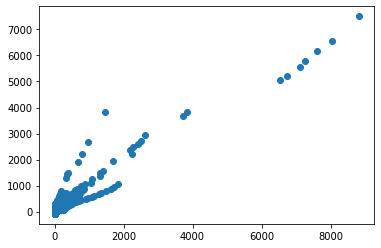

In [83]:
plt.scatter(y_test,y_pred)

In [84]:
import seaborn as sns

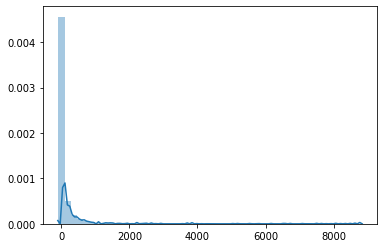

In [87]:
sns.distplot((y_test,y_pred))

# COVID-19 CASES: COUNTRY_WISE

In [88]:
country_wise_data = pd.read_csv("datasets_494766_1316664_country_wise_latest.csv")

In [89]:
country_wise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [90]:
country_wise_data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,33384,920,20179,12285,194,22,76,2.76,60.45,4.56,31517,1867,5.92,Eastern Mediterranean
1,Albania,3038,81,1744,1213,74,2,42,2.67,57.41,4.64,2535,503,19.84,Europe
2,Algeria,16879,968,12094,3817,475,9,210,5.73,71.65,8.00,13907,2972,21.37,Africa
3,Andorra,855,52,800,3,0,0,0,6.08,93.57,6.50,855,0,0.00,Europe
4,Angola,386,21,117,248,40,2,9,5.44,30.31,17.95,284,102,35.92,Africa


In [91]:
y=country_wise_data['Recovered']
X=country_wise_data.drop(['Recovered','Country/Region','WHO Region','Active','1 week % increase','Deaths / 100 Recovered','1 week change','Confirmed last week'],axis=1)

In [92]:
X

,Confirmed,Deaths,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases
0,33384,920,194,22,76,2.76,60.45
1,3038,81,74,2,42,2.67,57.41
2,16879,968,475,9,210,5.73,71.65
3,855,52,0,0,0,6.08,93.57
4,386,21,40,2,9,5.44,30.31
...,...,...,...,...,...,...,...
182,4647,18,306,1,3,0.39,10.63
183,10,1,0,0,0,10.00,80.00
184,1297,348,13,3,16,26.83,45.57
185,1895,42,263,12,0,2.22,71.13


In [93]:
y

0      20179
1       1744
2      12094
3        800
4        117
       ...  
182      494
183        8
184      591
185     1348
186      201
Name: Recovered, Length: 187, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=41)

In [99]:
X_train

,Confirmed,Deaths,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases
184,1297,348,13,3,16,26.83,45.57
20,41545,1530,1036,54,469,3.68,29.84
75,12,0,0,0,0,0.00,100.00
104,1818,19,76,0,0,1.05,17.44
118,539,0,54,0,0,0.00,4.64
...,...,...,...,...,...,...,...
89,51059,264,1376,0,438,0.52,31.92
65,198343,9032,279,10,501,4.55,92.09
80,66226,3309,1268,68,866,5.00,46.48
140,16,0,0,0,0,0.00,93.75


In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lr=LinearRegression()

In [102]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lr.intercept_

-16303.247449891689

In [107]:
lr.coef_

array([  0.67372385,  -2.1428311 ,  -9.96659993, 106.08604869,
        10.22020237,  30.27104293, 264.89640561])

In [110]:
pd.DataFrame(lr.coef_,X.columns,columns = ['coeff'])

,coeff
Confirmed,0.673724
Deaths,-2.142831
New cases,-9.966600
New deaths,106.086049
New recovered,10.220202
Deaths / 100 Cases,30.271043
Recovered / 100 Cases,264.896406


In [111]:
y_pred = lr.predict(X_test)

In [112]:
from sklearn import metrics

In [113]:
metrics.mean_squared_error(y_test,y_pred)

3662531174.639144

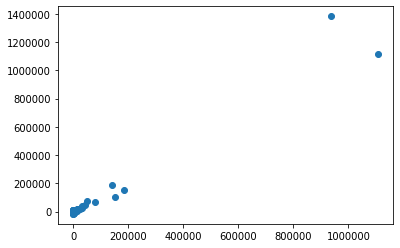

In [114]:
plt.scatter(y_test,y_pred)

In [115]:
import seaborn as sns

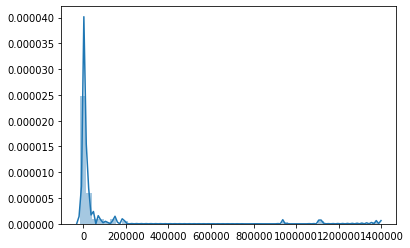

In [116]:
sns.distplot((y_test,y_pred))